<a href="https://colab.research.google.com/github/syedshubha/PulseSCQ/blob/main/W_StateCKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing required packages
%%capture
!pip install --quiet qiskit qiskit-aer pylatexenc qiskit-ibm-runtime qiskit-dynamics &> /dev/null

#$|W\rangle = \frac{1}{\sqrt{3}}(\left|001\rangle+|010\rangle+|100\rangle\right)$
We want to create the state using gate level coding first.

In [2]:
from qiskit_aer import *
from qiskit import *
from numpy import *
import warnings
import getpass

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import array_to_latex as show

In [3]:
simulator = AerSimulator(method='statevector')

qc = QuantumCircuit(3,1)
theta = 2 * acos(1 / sqrt(3))

qc.ry(theta,0)
qc.cry(pi/2,0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)

qc.save_statevector()
show(simulator.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

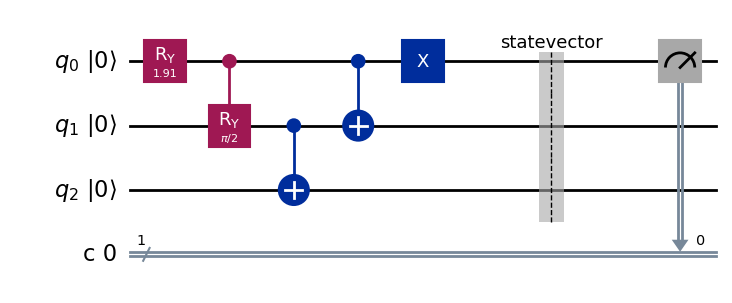

In [4]:
qc.measure(0,0)
qc.draw("mpl", initial_state=True)

In [5]:
qc.draw("latex_source")

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{R_Y}\\,(\\mathrm{1.911})} & \\ctrl{1} & \\qw & \\ctrl{1} & \\gate{\\mathrm{X}} \\barrier[0em]{2} & \\cds{0}{^{\\mathrm{statevector}}} & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\qw & \\gate{\\mathrm{R_Y}\\,(\\mathrm{\\frac{\\pi}{2}})} & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} :  }} & \\lstick{\\mathrm{{c} :  }} & \\lstick{/_{_{1}}} \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-3,0] & \\cw & \\cw\\\\\n\\\\ }}\n\\end{document}'

In [6]:
q = QuantumCircuit(3,1)
theta = 2 * acos(1 / sqrt(3))

q.ry(theta,0)
q.ry(pi/4,1)
q.cx(0,1)
q.ry(-pi/4,1)
q.cx(1,2)
q.cx(0,1)
q.x(0)

q.save_statevector()
show(simulator.run(q).result().get_statevector())

<IPython.core.display.Latex object>

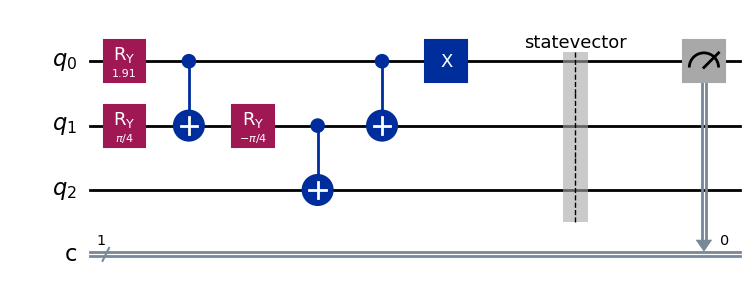

In [7]:
q.measure(0,0)
q.draw("mpl")

In [8]:
q.draw("latex_source")

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{R_Y}\\,(\\mathrm{1.911})} & \\ctrl{1} & \\qw & \\qw & \\ctrl{1} & \\gate{\\mathrm{X}} \\barrier[0em]{2} & \\cds{0}{^{\\mathrm{statevector}}} & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{R_Y}\\,(\\mathrm{\\frac{\\pi}{4}})} & \\targ & \\gate{\\mathrm{R_Y}\\,(\\mathrm{\\frac{-\\pi}{4}})} & \\ctrl{1} & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\qw & \\qw & \\qw & \\targ & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{c} :  }} & \\lstick{\\mathrm{{c} :  }} & \\lstick{/_{_{1}}} \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-3,0] & \\cw & \\cw\\\\\n\\\\ }}\n\\

In [9]:
import getpass
from qiskit_ibm_runtime import QiskitRuntimeService
import warnings

token = getpass.getpass("Enter IBM Quantum API Token: ")
QiskitRuntimeService.save_account(channel='ibm_quantum', token=token, overwrite=True)

Enter IBM Quantum API Token: ··········


In [10]:
def report_qubits(backend_name: str, qubits: list):
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    service = QiskitRuntimeService(channel="ibm_quantum")
    backend = service.backend(backend_name)
    props   = backend.properties()
    parameters = {}

    print(f"\n=== Backend: {backend_name} ===")
    for q in qubits:
        try:
            t1  = props.t1(q) * 1e6
            t2  = props.t2(q) * 1e6
            ro  = props.readout_error(q)

            parameters[q] = {
                "T1": t1,
                "T2": t2,
                "RO": ro
            }

            if t1 and t2 and ro is not None:
                print(f"Qubit {q:2d}: Available — T1={t1:.1f} µs, T2={t2:.1f} µs, RO err={ro:.5f}")
            else:
                print(f"Qubit {q:2d}: Missing data")
        except Exception as e:
            print(f"Qubit {q:2d}: Error reading data ({e})")
    return parameters

In [11]:
parameters= report_qubits("ibm_sherbrooke",[1, 2, 3])


=== Backend: ibm_sherbrooke ===
Qubit  1: Available — T1=306.4 µs, T2=307.0 µs, RO err=0.02222
Qubit  2: Available — T1=260.3 µs, T2=200.5 µs, RO err=0.01270
Qubit  3: Available — T1=396.7 µs, T2=386.5 µs, RO err=0.02490


In [12]:
parameters

{1: {'T1': 306.35738386608125, 'T2': 306.9797028120124, 'RO': 0.022216796875},
 2: {'T1': 260.3211878308971, 'T2': 200.49666129986815, 'RO': 0.0126953125},
 3: {'T1': 396.66745369903174, 'T2': 386.4530167494259, 'RO': 0.02490234375}}

In [13]:
backend_name="ibm_sherbrooke"
warnings.filterwarnings("ignore", category=DeprecationWarning)
service = QiskitRuntimeService(channel="ibm_cloud")
backend = service.backend(backend_name)


# --- Get Backend Properties ---
backend_defaults = backend.defaults()
backend_config = backend.configuration()
backend_properties = backend.properties()
dt = backend_config.dt # Sample time
print(f"Backend: {backend_name}")
print(f"Sample time (dt): {dt*1e9:.3f} ns")

Backend: ibm_sherbrooke
Sample time (dt): 0.222 ns


In [14]:
q0, q1, q2 = 1, 2, 3
print(f"Using physical qubits: q0 -> {q0}, q1 -> {q1}, q2 -> {q2}")

# Get drive frequencies needed for single-qubit gates
df0 = backend_defaults.qubit_freq_est[q0]
df1 = backend_defaults.qubit_freq_est[q1]
df2 = backend_defaults.qubit_freq_est[q2]
print(f"Drive Frequencies (GHz): Q{q0}={df0*1e-9:.4f}, Q{q1}={df1*1e-9:.4f}, Q{q2}={df2*1e-9:.4f}")

Using physical qubits: q0 -> 1, q1 -> 2, q2 -> 3
Drive Frequencies (GHz): Q1=4.7363, Q2=4.8192, Q3=4.7472
